In [196]:
# 주제 : 2020년 1월 2일 신규 상장 주식 분석

# 최근 들어 신규 상장 불패 신화 관련, 뉴스가 많이 들려오고 있습니다. 또한, 한때 공모주 열풍이 불기도 하였습니다.
# 그렇다면, 진짜로 공모주는 불패 신화일까? 또한 상장일 이후 언제쯤 판매하는 것이 최고의 이득을 볼 수 있는지 분석하는 최종 프로젝트를 하고자 합니다.
# 새로운 주식 데이터를 api입수는 하지 않았지만, 원래 이 데이터에 대해 관심 있어 공공데이터 포털 : 금융위원회_주식시세정보  및 KIND : 신규 상장 기업 정보를 이용하고자 합니다.

In [23]:
import pandas as pd
new_stock=pd.read_csv(r"신규상장기업현황.csv")

'''
출처
https://kind.krx.co.kr/listinvstg/listingcompany.do?method=searchListingTypeMain
'''

In [27]:
new_stock.tail()

,회사명,종목코드,상장일,상장유형,증권구분,업종,국적,상장주선인/지정자문인
2293,버추얼텍,36620,2000.1.11,신규상장,주권,NaN,대한민국,유안타증권(주)
2294,택산전자,36900,2000.1.11,신규상장,주권,NaN,대한민국,하나대투(하나IB)
2295,성도이엔지,37350,2000.1.11,신규상장,주권,NaN,대한민국,한화투자증권(주)
2296,이지,37370,2000.1.11,신규상장,주권,NaN,대한민국,삼성증권(주)
2297,제일중공,38010,2000.1.11,신규상장,주권,NaN,대한민국,유진투자증권(주)


In [71]:
newstock20_21 = list(new_stock.query('상장일>="2020" & 상장일<="2022"')["종목코드"])

### 금융위원회_주식시세정보 
출처 : 공공데이터포털

한국거래소에서 제공하는 주식시세 정보
주식시세, 수익증권시세, 신주인수권증권시세, 신주인수권증서시세에 대한 오퍼레이션을 제공한다.


In [52]:
# 공공 데이터 포털 요청 관련
import requests
import xml.etree.ElementTree as et
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

# 시각화
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns

# 기본 module
import pandas as pd
import numpy as np
import pprint
from os import name
from tqdm import tqdm

###한글 폰트###
rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.family'] = 'Malgun Gothic'

font_name = font_manager.FontProperties(fname="/Users/gominseong/Library/Fonts/MaruBuri-Regular.otf").get_name()
rc('font', family=font_name)

encoding = ''
decoding = ''
url = 'http://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo'


In [76]:
df = pd.DataFrame()
for stock in tqdm(newstock20_21):
    params ={'serviceKey' : decoding, 
            'likeSrtnCd': stock,
            'numOfRows':9999,
             'pageNo':1,
             'resultType': "xml",
             'beginBasDt':20180101

        #'stdDt':20171130
        }
    response = requests.get(url, params=params)
    content = response.text
    #print(response.text)
    # 깔끔한 출력 위한 코드
    pp = pprint.PrettyPrinter(indent=4)
    #print(pp.pprint(content))

    #bs4 사용하여 item 태그 분리

    xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
    rows = xml_obj.findAll('item')
    #print(rows)
    # 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
    row_list = [] # 행값
    name_list = [] # 열이름값
    value_list = [] #데이터값

    # xml 안의 데이터 수집
    for i in range(0, len(rows)):
        columns = rows[i].find_all()
        #첫째 행 데이터 수집
        for j in range(0,len(columns)):
            if i ==0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)
        # 데이터 리스트 값 초기화
        value_list=[]
        
    
    #xml값 DataFrame으로 만들기
    df1 = pd.DataFrame(row_list, columns=name_list)
    df = pd.concat([df, df1], axis=0)
    print(df.shape)

  1%|▎                                                             | 1/199 [00:02<08:31,  2.58s/it]

(308, 15)


  1%|▌                                                             | 2/199 [00:04<07:37,  2.32s/it]

(617, 15)


  2%|▉                                                             | 3/199 [00:06<07:30,  2.30s/it]

(930, 15)


  2%|█▏                                                            | 4/199 [00:09<07:22,  2.27s/it]

(1243, 15)


  3%|█▌                                                            | 5/199 [00:11<07:28,  2.31s/it]

(1558, 15)


  3%|█▊                                                            | 6/199 [00:13<07:22,  2.29s/it]

(1875, 15)


  4%|██▏                                                           | 7/199 [00:16<07:16,  2.27s/it]

(2193, 15)


  4%|██▍                                                           | 8/199 [00:18<07:07,  2.24s/it]

(2505, 15)


  5%|██▊                                                           | 9/199 [00:20<06:58,  2.20s/it]

(2832, 15)


  5%|███                                                          | 10/199 [00:22<06:55,  2.20s/it]

(3164, 15)


  6%|███▎                                                         | 11/199 [00:24<06:52,  2.19s/it]

(3497, 15)


  6%|███▋                                                         | 12/199 [00:27<07:01,  2.25s/it]

(3833, 15)


  7%|███▉                                                         | 13/199 [00:29<07:08,  2.30s/it]

(4173, 15)


  7%|████▎                                                        | 14/199 [00:31<07:06,  2.31s/it]

(4513, 15)


  8%|████▌                                                        | 15/199 [00:34<07:20,  2.39s/it]

(4854, 15)


  8%|████▉                                                        | 16/199 [00:37<07:30,  2.46s/it]

(5195, 15)


  9%|█████▏                                                       | 17/199 [00:39<07:23,  2.44s/it]

(5538, 15)


  9%|█████▌                                                       | 18/199 [00:41<07:13,  2.39s/it]

(5884, 15)


 10%|█████▊                                                       | 19/199 [00:44<07:22,  2.46s/it]

(6230, 15)


 10%|██████▏                                                      | 20/199 [00:46<07:20,  2.46s/it]

(6578, 15)


 11%|██████▍                                                      | 21/199 [00:49<07:27,  2.51s/it]

(6927, 15)


 11%|██████▋                                                      | 22/199 [00:51<07:07,  2.41s/it]

(7276, 15)


 12%|███████                                                      | 23/199 [00:54<07:16,  2.48s/it]

(7626, 15)


 12%|███████▎                                                     | 24/199 [00:56<06:59,  2.40s/it]

(7980, 15)


 13%|███████▋                                                     | 25/199 [00:58<06:49,  2.35s/it]

(8334, 15)


 13%|███████▉                                                     | 26/199 [01:01<06:46,  2.35s/it]

(8689, 15)


 14%|████████▎                                                    | 27/199 [01:03<06:35,  2.30s/it]

(9048, 15)


 14%|████████▌                                                    | 28/199 [01:05<06:43,  2.36s/it]

(9408, 15)


 15%|████████▉                                                    | 29/199 [01:08<06:53,  2.43s/it]

(9769, 15)


 15%|█████████▏                                                   | 30/199 [01:10<06:50,  2.43s/it]

(10132, 15)


 16%|█████████▌                                                   | 31/199 [01:12<06:35,  2.35s/it]

(10496, 15)


 16%|█████████▊                                                   | 32/199 [01:15<06:21,  2.28s/it]

(10860, 15)


 17%|██████████                                                   | 33/199 [01:17<06:14,  2.26s/it]

(11224, 15)


 17%|██████████▍                                                  | 34/199 [01:19<06:11,  2.25s/it]

(11590, 15)


 18%|██████████▋                                                  | 35/199 [01:21<06:07,  2.24s/it]

(11959, 15)


 18%|███████████                                                  | 36/199 [01:24<06:09,  2.27s/it]

(12329, 15)


 19%|███████████▎                                                 | 37/199 [01:26<06:08,  2.27s/it]

(12700, 15)


 19%|███████████▋                                                 | 38/199 [01:28<05:57,  2.22s/it]

(13071, 15)


 20%|███████████▉                                                 | 39/199 [01:30<05:54,  2.22s/it]

(13445, 15)


 20%|████████████▎                                                | 40/199 [01:32<05:55,  2.24s/it]

(13811, 15)


 21%|████████████▌                                                | 41/199 [01:35<06:02,  2.29s/it]

(14189, 15)


 21%|████████████▊                                                | 42/199 [01:37<05:51,  2.24s/it]

(14568, 15)


 22%|█████████████▏                                               | 43/199 [01:39<05:46,  2.22s/it]

(14952, 15)


 22%|█████████████▍                                               | 44/199 [01:41<05:44,  2.22s/it]

(15338, 15)


 23%|█████████████▊                                               | 45/199 [01:44<05:45,  2.25s/it]

(15729, 15)


 23%|██████████████                                               | 46/199 [01:46<05:41,  2.23s/it]

(16123, 15)


 24%|██████████████▍                                              | 47/199 [01:49<06:01,  2.38s/it]

(17360, 15)


 24%|██████████████▋                                              | 48/199 [01:51<05:59,  2.38s/it]

(17755, 15)


 25%|███████████████                                              | 49/199 [01:53<05:42,  2.28s/it]

(18152, 15)


 25%|███████████████▎                                             | 50/199 [01:55<05:41,  2.29s/it]

(18549, 15)


 26%|███████████████▋                                             | 51/199 [01:58<05:35,  2.27s/it]

(18948, 15)


 26%|███████████████▉                                             | 52/199 [02:00<05:39,  2.31s/it]

(19348, 15)


 27%|████████████████▏                                            | 53/199 [02:02<05:36,  2.30s/it]

(19749, 15)


 27%|████████████████▌                                            | 54/199 [02:05<05:34,  2.31s/it]

(20151, 15)


 28%|████████████████▊                                            | 55/199 [02:07<05:27,  2.27s/it]

(20554, 15)


 28%|█████████████████▏                                           | 56/199 [02:09<05:26,  2.28s/it]

(20958, 15)


 29%|█████████████████▍                                           | 57/199 [02:11<05:25,  2.29s/it]

(21369, 15)


 29%|█████████████████▊                                           | 58/199 [02:14<05:28,  2.33s/it]

(21783, 15)


 30%|██████████████████                                           | 59/199 [02:16<05:32,  2.37s/it]

(22201, 15)


 30%|██████████████████▍                                          | 60/199 [02:19<05:24,  2.33s/it]

(22622, 15)


 31%|██████████████████▋                                          | 61/199 [02:21<05:19,  2.32s/it]

(23055, 15)


 31%|███████████████████                                          | 62/199 [02:23<05:10,  2.27s/it]

(23489, 15)


 32%|███████████████████▎                                         | 63/199 [02:25<05:06,  2.25s/it]

(23927, 15)


 32%|███████████████████▌                                         | 64/199 [02:27<05:04,  2.25s/it]

(24366, 15)


 33%|███████████████████▉                                         | 65/199 [02:30<04:59,  2.23s/it]

(24809, 15)


 33%|████████████████████▏                                        | 66/199 [02:32<04:59,  2.25s/it]

(25257, 15)


 34%|████████████████████▌                                        | 67/199 [02:34<04:55,  2.23s/it]

(25706, 15)


 34%|████████████████████▊                                        | 68/199 [02:37<05:00,  2.29s/it]

(26161, 15)


 35%|█████████████████████▏                                       | 69/199 [02:39<04:57,  2.29s/it]

(26616, 15)


 35%|█████████████████████▍                                       | 70/199 [02:41<04:54,  2.28s/it]

(27074, 15)


 36%|█████████████████████▊                                       | 71/199 [02:43<04:54,  2.30s/it]

(27532, 15)


 36%|██████████████████████                                       | 72/199 [02:46<04:49,  2.28s/it]

(27990, 15)


 37%|██████████████████████▍                                      | 73/199 [02:48<04:50,  2.31s/it]

(28449, 15)


 37%|██████████████████████▋                                      | 74/199 [02:50<04:50,  2.33s/it]

(28910, 15)


 38%|██████████████████████▉                                      | 75/199 [02:53<04:42,  2.28s/it]

(29372, 15)


 38%|███████████████████████▎                                     | 76/199 [02:55<04:48,  2.35s/it]

(29837, 15)


 39%|███████████████████████▌                                     | 77/199 [02:57<04:47,  2.36s/it]

(30303, 15)


 39%|███████████████████████▉                                     | 78/199 [03:00<04:45,  2.36s/it]

(30776, 15)


 40%|████████████████████████▏                                    | 79/199 [03:02<04:47,  2.40s/it]

(31254, 15)


 40%|████████████████████████▌                                    | 80/199 [03:05<04:38,  2.34s/it]

(31732, 15)


 41%|████████████████████████▊                                    | 81/199 [03:07<04:38,  2.36s/it]

(32219, 15)


 41%|█████████████████████████▏                                   | 82/199 [03:09<04:34,  2.34s/it]

(32709, 15)


 42%|█████████████████████████▍                                   | 83/199 [03:11<04:29,  2.32s/it]

(33201, 15)


 42%|█████████████████████████▋                                   | 84/199 [03:14<04:31,  2.36s/it]

(33699, 15)


 43%|██████████████████████████                                   | 85/199 [03:16<04:22,  2.31s/it]

(34197, 15)


 43%|██████████████████████████▎                                  | 86/199 [03:19<04:25,  2.35s/it]

(34696, 15)


 44%|██████████████████████████▋                                  | 87/199 [03:21<04:25,  2.37s/it]

(35198, 15)


 44%|██████████████████████████▉                                  | 88/199 [03:23<04:20,  2.35s/it]

(35701, 15)


 45%|███████████████████████████▎                                 | 89/199 [03:26<04:20,  2.37s/it]

(36205, 15)


 45%|███████████████████████████▌                                 | 90/199 [03:28<04:15,  2.34s/it]

(36712, 15)


 46%|███████████████████████████▉                                 | 91/199 [03:31<04:19,  2.40s/it]

(37219, 15)


 46%|████████████████████████████▏                                | 92/199 [03:33<04:13,  2.37s/it]

(37728, 15)


 47%|████████████████████████████▌                                | 93/199 [03:35<04:08,  2.35s/it]

(38239, 15)


 47%|████████████████████████████▊                                | 94/199 [03:37<04:01,  2.30s/it]

(38754, 15)


 48%|█████████████████████████████                                | 95/199 [03:40<03:58,  2.29s/it]

(39269, 15)


 48%|█████████████████████████████▍                               | 96/199 [03:42<04:04,  2.37s/it]

(39785, 15)


 49%|█████████████████████████████▋                               | 97/199 [03:45<04:04,  2.40s/it]

(40302, 15)


 49%|██████████████████████████████                               | 98/199 [03:47<04:03,  2.41s/it]

(40827, 15)


 50%|██████████████████████████████▎                              | 99/199 [03:49<03:53,  2.34s/it]

(41355, 15)


 50%|██████████████████████████████▏                             | 100/199 [03:51<03:50,  2.33s/it]

(41884, 15)


 51%|██████████████████████████████▍                             | 101/199 [03:54<03:49,  2.34s/it]

(42414, 15)


 51%|██████████████████████████████▊                             | 102/199 [03:56<03:42,  2.30s/it]

(42944, 15)


 52%|███████████████████████████████                             | 103/199 [03:58<03:41,  2.31s/it]

(43475, 15)


 52%|███████████████████████████████▎                            | 104/199 [04:01<03:40,  2.33s/it]

(44008, 15)


 53%|███████████████████████████████▋                            | 105/199 [04:03<03:41,  2.36s/it]

(44542, 15)


 53%|███████████████████████████████▉                            | 106/199 [04:06<03:42,  2.39s/it]

(45076, 15)


 54%|████████████████████████████████▎                           | 107/199 [04:08<03:37,  2.36s/it]

(45611, 15)


 54%|████████████████████████████████▌                           | 108/199 [04:10<03:36,  2.38s/it]

(46150, 15)


 55%|████████████████████████████████▊                           | 109/199 [04:13<03:41,  2.46s/it]

(46689, 15)


 55%|█████████████████████████████████▏                          | 110/199 [04:15<03:36,  2.43s/it]

(47242, 15)


 56%|█████████████████████████████████▍                          | 111/199 [04:18<03:36,  2.46s/it]

(47796, 15)


 56%|█████████████████████████████████▊                          | 112/199 [04:20<03:35,  2.47s/it]

(48277, 15)


 57%|██████████████████████████████████                          | 113/199 [04:23<03:32,  2.47s/it]

(48833, 15)


 57%|██████████████████████████████████▎                         | 114/199 [04:25<03:30,  2.48s/it]

(49390, 15)


 58%|██████████████████████████████████▋                         | 115/199 [04:28<03:23,  2.43s/it]

(49947, 15)


 58%|██████████████████████████████████▉                         | 116/199 [04:31<03:32,  2.56s/it]

(50505, 15)


 59%|███████████████████████████████████▎                        | 117/199 [04:33<03:30,  2.56s/it]

(51064, 15)


 59%|███████████████████████████████████▌                        | 118/199 [04:35<03:21,  2.49s/it]

(51623, 15)


 60%|███████████████████████████████████▉                        | 119/199 [04:38<03:12,  2.41s/it]

(52185, 15)


 60%|████████████████████████████████████▏                       | 120/199 [04:40<03:10,  2.41s/it]

(52749, 15)


 61%|████████████████████████████████████▍                       | 121/199 [04:43<03:08,  2.41s/it]

(53314, 15)


 61%|████████████████████████████████████▊                       | 122/199 [04:45<03:07,  2.43s/it]

(53879, 15)


 62%|█████████████████████████████████████                       | 123/199 [04:48<03:12,  2.53s/it]

(54445, 15)


 62%|█████████████████████████████████████▍                      | 124/199 [04:50<03:07,  2.50s/it]

(55012, 15)


 63%|█████████████████████████████████████▋                      | 125/199 [04:53<03:02,  2.47s/it]

(55579, 15)


 63%|█████████████████████████████████████▉                      | 126/199 [04:56<03:25,  2.82s/it]

(58354, 15)


 64%|██████████████████████████████████████▎                     | 127/199 [04:59<03:18,  2.76s/it]

(58924, 15)


 64%|██████████████████████████████████████▌                     | 128/199 [05:01<03:07,  2.64s/it]

(59495, 15)


 65%|██████████████████████████████████████▉                     | 129/199 [05:04<03:00,  2.59s/it]

(60067, 15)


 65%|███████████████████████████████████████▏                    | 130/199 [05:06<02:54,  2.53s/it]

(60639, 15)


 66%|███████████████████████████████████████▍                    | 131/199 [05:08<02:49,  2.50s/it]

(61215, 15)


 66%|███████████████████████████████████████▊                    | 132/199 [05:11<02:48,  2.52s/it]

(61792, 15)


 67%|████████████████████████████████████████                    | 133/199 [05:13<02:42,  2.46s/it]

(62372, 15)


 67%|████████████████████████████████████████▍                   | 134/199 [05:16<02:38,  2.44s/it]

(62952, 15)


 68%|████████████████████████████████████████▋                   | 135/199 [05:18<02:36,  2.44s/it]

(63534, 15)


 68%|█████████████████████████████████████████                   | 136/199 [05:21<02:33,  2.44s/it]

(64117, 15)


 69%|█████████████████████████████████████████▎                  | 137/199 [05:23<02:28,  2.39s/it]

(64703, 15)


 69%|█████████████████████████████████████████▌                  | 138/199 [05:25<02:26,  2.40s/it]

(65293, 15)


 70%|█████████████████████████████████████████▉                  | 139/199 [05:28<02:21,  2.35s/it]

(65888, 15)


 70%|██████████████████████████████████████████▏                 | 140/199 [05:30<02:19,  2.36s/it]

(66484, 15)


 71%|██████████████████████████████████████████▌                 | 141/199 [05:32<02:18,  2.38s/it]

(67081, 15)


 71%|██████████████████████████████████████████▊                 | 142/199 [05:35<02:17,  2.41s/it]

(67681, 15)


 72%|███████████████████████████████████████████                 | 143/199 [05:38<02:22,  2.55s/it]

(68285, 15)


 72%|███████████████████████████████████████████▍                | 144/199 [05:41<02:27,  2.68s/it]

(68891, 15)


 73%|███████████████████████████████████████████▋                | 145/199 [05:44<02:30,  2.78s/it]

(69501, 15)


 73%|████████████████████████████████████████████                | 146/199 [05:46<02:20,  2.64s/it]

(70118, 15)


 74%|████████████████████████████████████████████▎               | 147/199 [05:49<02:14,  2.58s/it]

(70736, 15)


 74%|████████████████████████████████████████████▌               | 148/199 [05:51<02:07,  2.51s/it]

(71355, 15)


 75%|████████████████████████████████████████████▉               | 149/199 [05:53<02:03,  2.47s/it]

(71975, 15)


 75%|█████████████████████████████████████████████▏              | 150/199 [05:56<01:59,  2.44s/it]

(72596, 15)


 76%|█████████████████████████████████████████████▌              | 151/199 [05:58<01:55,  2.41s/it]

(73217, 15)


 76%|█████████████████████████████████████████████▊              | 152/199 [06:00<01:52,  2.39s/it]

(73840, 15)


 77%|██████████████████████████████████████████████▏             | 153/199 [06:03<01:49,  2.37s/it]

(74465, 15)


 77%|██████████████████████████████████████████████▍             | 154/199 [06:05<01:50,  2.46s/it]

(75092, 15)


 78%|██████████████████████████████████████████████▋             | 155/199 [06:08<01:47,  2.43s/it]

(75720, 15)


 78%|███████████████████████████████████████████████             | 156/199 [06:10<01:42,  2.39s/it]

(76356, 15)


 79%|███████████████████████████████████████████████▎            | 157/199 [06:12<01:42,  2.43s/it]

(76996, 15)


 79%|███████████████████████████████████████████████▋            | 158/199 [06:15<01:40,  2.44s/it]

(77637, 15)


 80%|███████████████████████████████████████████████▉            | 159/199 [06:17<01:37,  2.45s/it]

(78281, 15)


 80%|████████████████████████████████████████████████▏           | 160/199 [06:20<01:37,  2.49s/it]

(78927, 15)


 81%|████████████████████████████████████████████████▌           | 161/199 [06:22<01:34,  2.50s/it]

(79574, 15)


 81%|████████████████████████████████████████████████▊           | 162/199 [06:25<01:34,  2.55s/it]

(80223, 15)


 82%|█████████████████████████████████████████████████▏          | 163/199 [06:28<01:31,  2.53s/it]

(80874, 15)


 82%|█████████████████████████████████████████████████▍          | 164/199 [06:30<01:30,  2.59s/it]

(81529, 15)


 83%|█████████████████████████████████████████████████▋          | 165/199 [06:33<01:26,  2.53s/it]

(82186, 15)


 83%|██████████████████████████████████████████████████          | 166/199 [06:35<01:24,  2.57s/it]

(82831, 15)


 84%|██████████████████████████████████████████████████▎         | 167/199 [06:38<01:20,  2.50s/it]

(83490, 15)


 84%|██████████████████████████████████████████████████▋         | 168/199 [06:40<01:17,  2.49s/it]

(84151, 15)


 85%|██████████████████████████████████████████████████▉         | 169/199 [06:43<01:14,  2.48s/it]

(84794, 15)


 85%|███████████████████████████████████████████████████▎        | 170/199 [06:45<01:12,  2.50s/it]

(85456, 15)


 86%|███████████████████████████████████████████████████▌        | 171/199 [06:48<01:08,  2.46s/it]

(86122, 15)


 86%|███████████████████████████████████████████████████▊        | 172/199 [06:50<01:05,  2.43s/it]

(86765, 15)


 87%|████████████████████████████████████████████████████▏       | 173/199 [06:53<01:04,  2.49s/it]

(87439, 15)


 87%|████████████████████████████████████████████████████▍       | 174/199 [06:55<01:02,  2.52s/it]

(88114, 15)


 88%|████████████████████████████████████████████████████▊       | 175/199 [06:58<00:59,  2.48s/it]

(88790, 15)


 88%|█████████████████████████████████████████████████████       | 176/199 [07:00<00:56,  2.47s/it]

(89467, 15)


 89%|█████████████████████████████████████████████████████▎      | 177/199 [07:02<00:54,  2.46s/it]

(89762, 15)


 89%|█████████████████████████████████████████████████████▋      | 178/199 [07:05<00:51,  2.44s/it]

(90444, 15)


 90%|█████████████████████████████████████████████████████▉      | 179/199 [07:08<00:50,  2.54s/it]

(91128, 15)


 90%|██████████████████████████████████████████████████████▎     | 180/199 [07:10<00:47,  2.51s/it]

(91812, 15)


 91%|██████████████████████████████████████████████████████▌     | 181/199 [07:12<00:44,  2.46s/it]

(92499, 15)


 91%|██████████████████████████████████████████████████████▊     | 182/199 [07:15<00:42,  2.53s/it]

(93186, 15)


 92%|███████████████████████████████████████████████████████▏    | 183/199 [07:18<00:40,  2.53s/it]

(93891, 15)


 92%|███████████████████████████████████████████████████████▍    | 184/199 [07:20<00:37,  2.51s/it]

(94536, 15)


 93%|███████████████████████████████████████████████████████▊    | 185/199 [07:23<00:34,  2.50s/it]

(95191, 15)


 93%|████████████████████████████████████████████████████████    | 186/199 [07:25<00:32,  2.49s/it]

(95912, 15)


 94%|████████████████████████████████████████████████████████▍   | 187/199 [07:28<00:30,  2.50s/it]

(96634, 15)


 94%|████████████████████████████████████████████████████████▋   | 188/199 [07:30<00:27,  2.48s/it]

(97276, 15)


 95%|████████████████████████████████████████████████████████▉   | 189/199 [07:32<00:24,  2.48s/it]

(98026, 15)


 95%|█████████████████████████████████████████████████████████▎  | 190/199 [07:35<00:22,  2.52s/it]

(98778, 15)


 96%|█████████████████████████████████████████████████████████▌  | 191/199 [07:37<00:19,  2.49s/it]

(99420, 15)


 96%|█████████████████████████████████████████████████████████▉  | 192/199 [07:40<00:17,  2.48s/it]

(100176, 15)


 97%|██████████████████████████████████████████████████████████▏ | 193/199 [07:42<00:14,  2.46s/it]

(100934, 15)


 97%|██████████████████████████████████████████████████████████▍ | 194/199 [07:45<00:12,  2.48s/it]

(101693, 15)


 98%|██████████████████████████████████████████████████████████▊ | 195/199 [07:47<00:09,  2.50s/it]

(102454, 15)


 98%|███████████████████████████████████████████████████████████ | 196/199 [07:50<00:07,  2.52s/it]

(103221, 15)


 99%|███████████████████████████████████████████████████████████▍| 197/199 [07:53<00:05,  2.53s/it]

(103968, 15)


 99%|███████████████████████████████████████████████████████████▋| 198/199 [07:55<00:02,  2.51s/it]

(104687, 15)


100%|████████████████████████████████████████████████████████████| 199/199 [07:57<00:00,  2.40s/it]

(105410, 15)


In [ ]:
df.to_csv("KRX_NewStock_2020~2021.csv", index=False)

In [151]:
df = pd.read_csv("KRX_NewStock_2020~2021.csv")
newstock20_21 = list(df["srtnCd"].unique())

df.columns

Index(['basDt', 'srtnCd', 'isinCd', 'itmsNm', 'mrktCtg', 'clpr', 'vs', 'fltRt',
       'mkp', 'hipr', 'lopr', 'trqu', 'trPrc', 'lstgStCnt', 'mrktTotAmt'],
      dtype='object')

#### newstock20_21 : 2020년~2021년 KRX신규상장 종목번호 리스트
#### df : 위에 해당하는 기업의 주가 정보 데이터 프레임
|| df columns 설명 || 
- basDt 기준일자
- srtnCd 종목코드
- isinCd 국제채권번호
- itmsNm 종목명
- mrktCtg 상장시장
- clpr 종가
- vs 전일 대비 등락
- fltRt 전일 대비 등락률
- mkp 시가
- hipr 고가
- lowpr 저가
- trqu 거래량
- trPrc 거래 금액
- lstgStCnt 상장 주식 수
- mrktTotAmt 시총

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105410 entries, 0 to 105409
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   basDt       105410 non-null  int64  
 1   srtnCd      105410 non-null  int64  
 2   isinCd      105410 non-null  object 
 3   itmsNm      105410 non-null  object 
 4   mrktCtg     105410 non-null  object 
 5   clpr        105410 non-null  int64  
 6   vs          105410 non-null  int64  
 7   fltRt       105410 non-null  float64
 8   mkp         105410 non-null  int64  
 9   hipr        105410 non-null  int64  
 10  lopr        105410 non-null  int64  
 11  trqu        105410 non-null  int64  
 12  trPrc       105410 non-null  int64  
 13  lstgStCnt   105410 non-null  int64  
 14  mrktTotAmt  105410 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 12.1+ MB


In [153]:
df.head()

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
0,20230327,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
1,20230324,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
2,20230323,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
3,20230322,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
4,20230321,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000


In [154]:
trading_day = sorted(list(df["basDt"].unique()))

In [155]:
df['basDt'] = df['basDt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

#### 2020년 1월 2일에 상장한 주식들은 2022년까지 어떤 상황을 겪었을까

In [156]:
df.query('basDt=="2020-01-02"')

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
17359,2020-01-02,189860,KR7189860000,서전기전,KOSDAQ,3770,-10,-0.26,3745,3800,3725,42172,158836350,9698780,36564400600
58351,2020-01-02,179900,KR7179900006,유티아이,KOSDAQ,20050,1550,8.38,18400,20650,18400,862556,17001304450,15864895,318091144750
58352,2020-01-02,299900,KR7299900001,위지윅스튜디오,KOSDAQ,6220,830,15.40,5910,6870,5720,3351386,21375009350,9213507,57308013540
58353,2020-01-02,309900,KR7309900009,티티씨디펜스,KONEX,5700,220,4.01,5470,5900,4660,4315,22699920,10000000,57000000000


In [157]:
stock20200102 = ["서전기전", "유티아이", "위지윅스튜디오", "티티씨디펜스"]

In [158]:
price20200102 = []
for stock in stock20200102:
    data = df.query('itmsNm in @stock').sort_values("basDt")
    data_lst = list(data["clpr"])
    price20200102.append(np.pad(data_lst,(0,800-len(data_lst)),constant_values=0))

In [184]:
day = sorted(df["basDt"].unique())

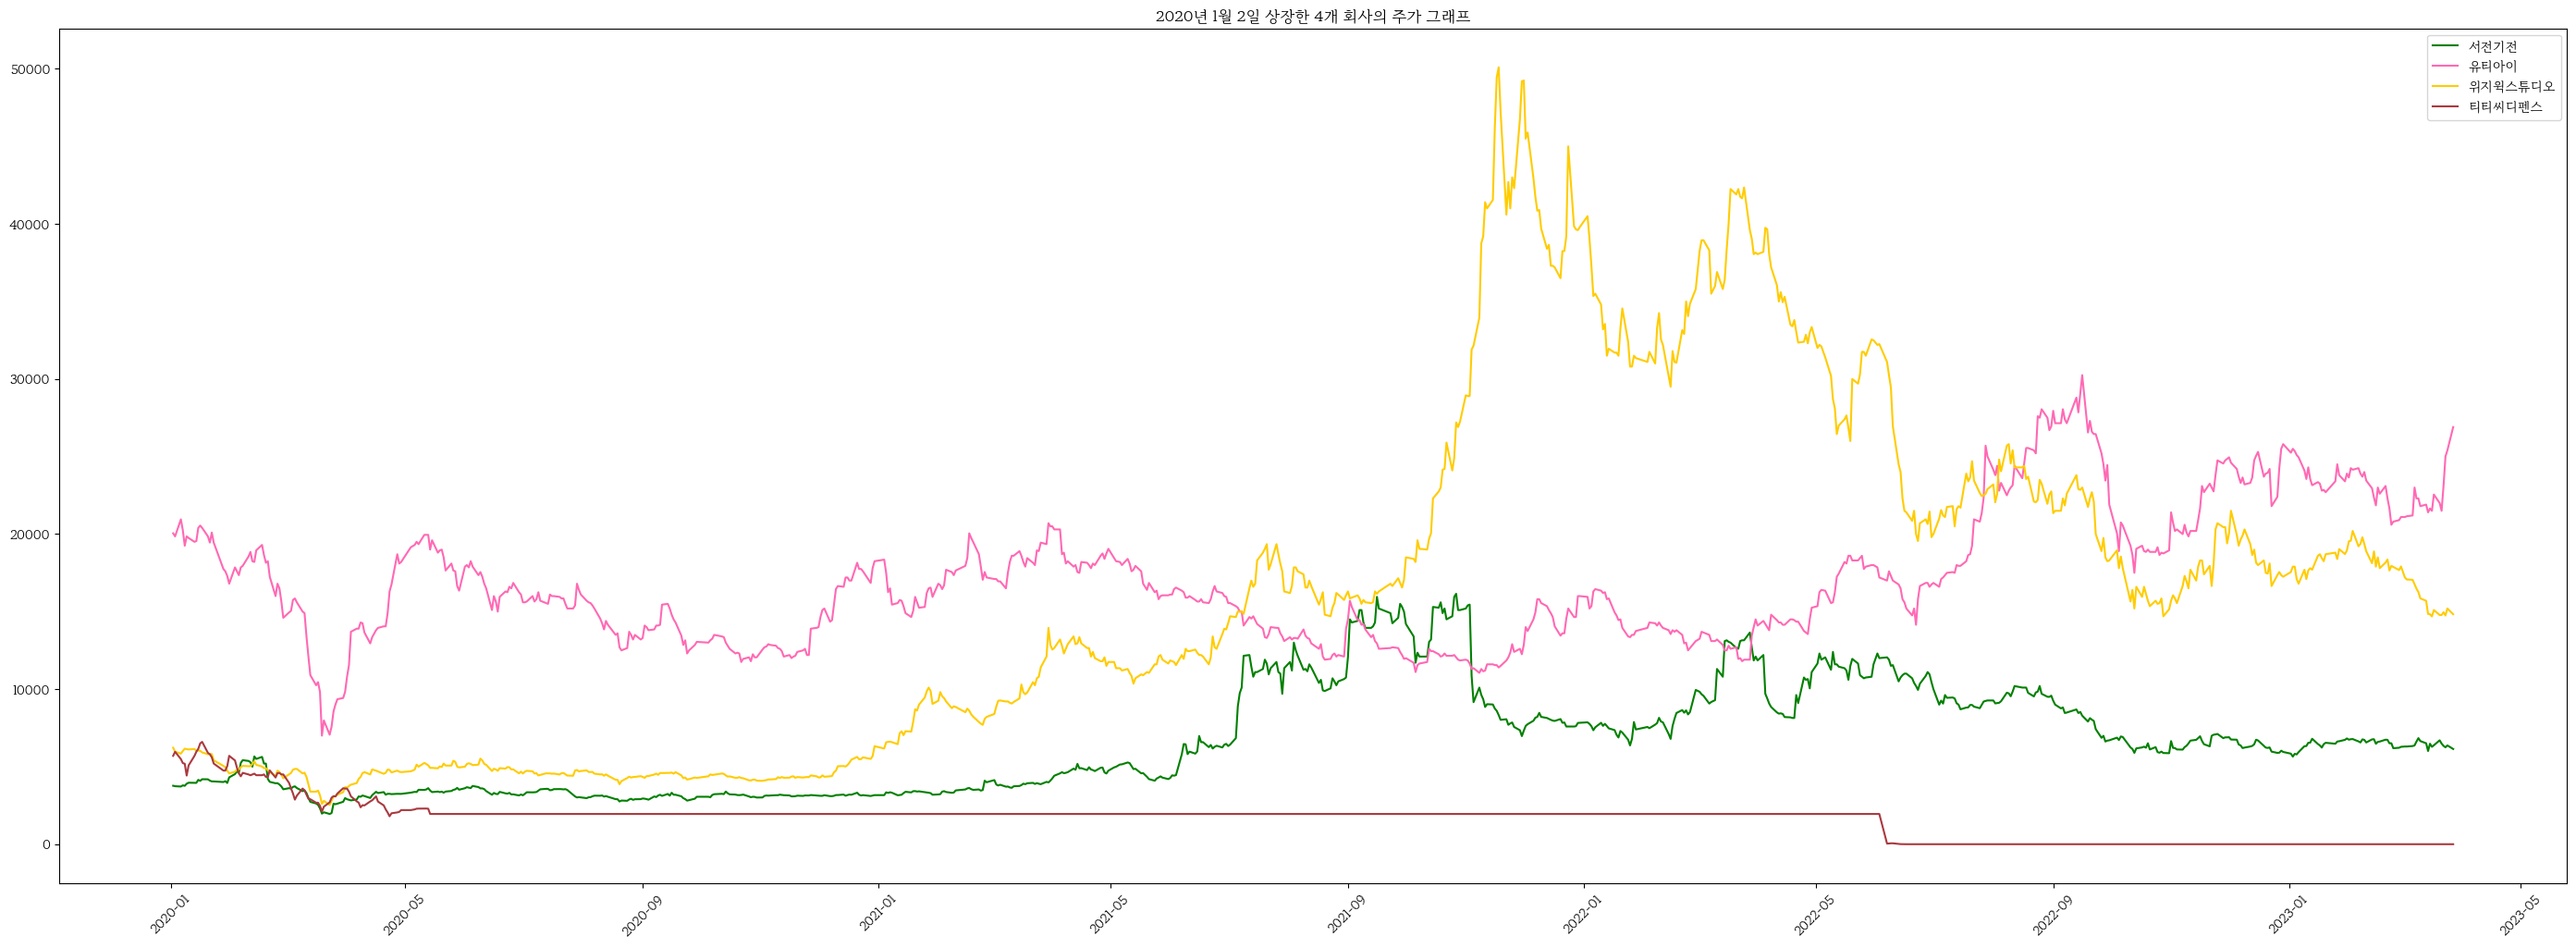

In [189]:
plt.figure(figsize = (35, 12)) # 전체 figure 크기

color =["green", "hotpink", (1, 0.8, 0), "#AA393F"]
for i, (data, label, c) in enumerate(zip(price20200102, stock20200102, color)):
    plt.plot(day, data, label = label, color=c) #이름으로 색 바꾸기 
plt.title("2020년 1월 2일 상장한 4개 회사의 주가 그래프", fontsize=30)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [190]:
price20200102 = []
for stock in stock20200102:
    data = df.query('itmsNm in @stock').sort_values("basDt")
    data_lst = list(data["mrktTotAmt"])
    price20200102.append(np.pad(data_lst,(0,800-len(data_lst)),constant_values=0))

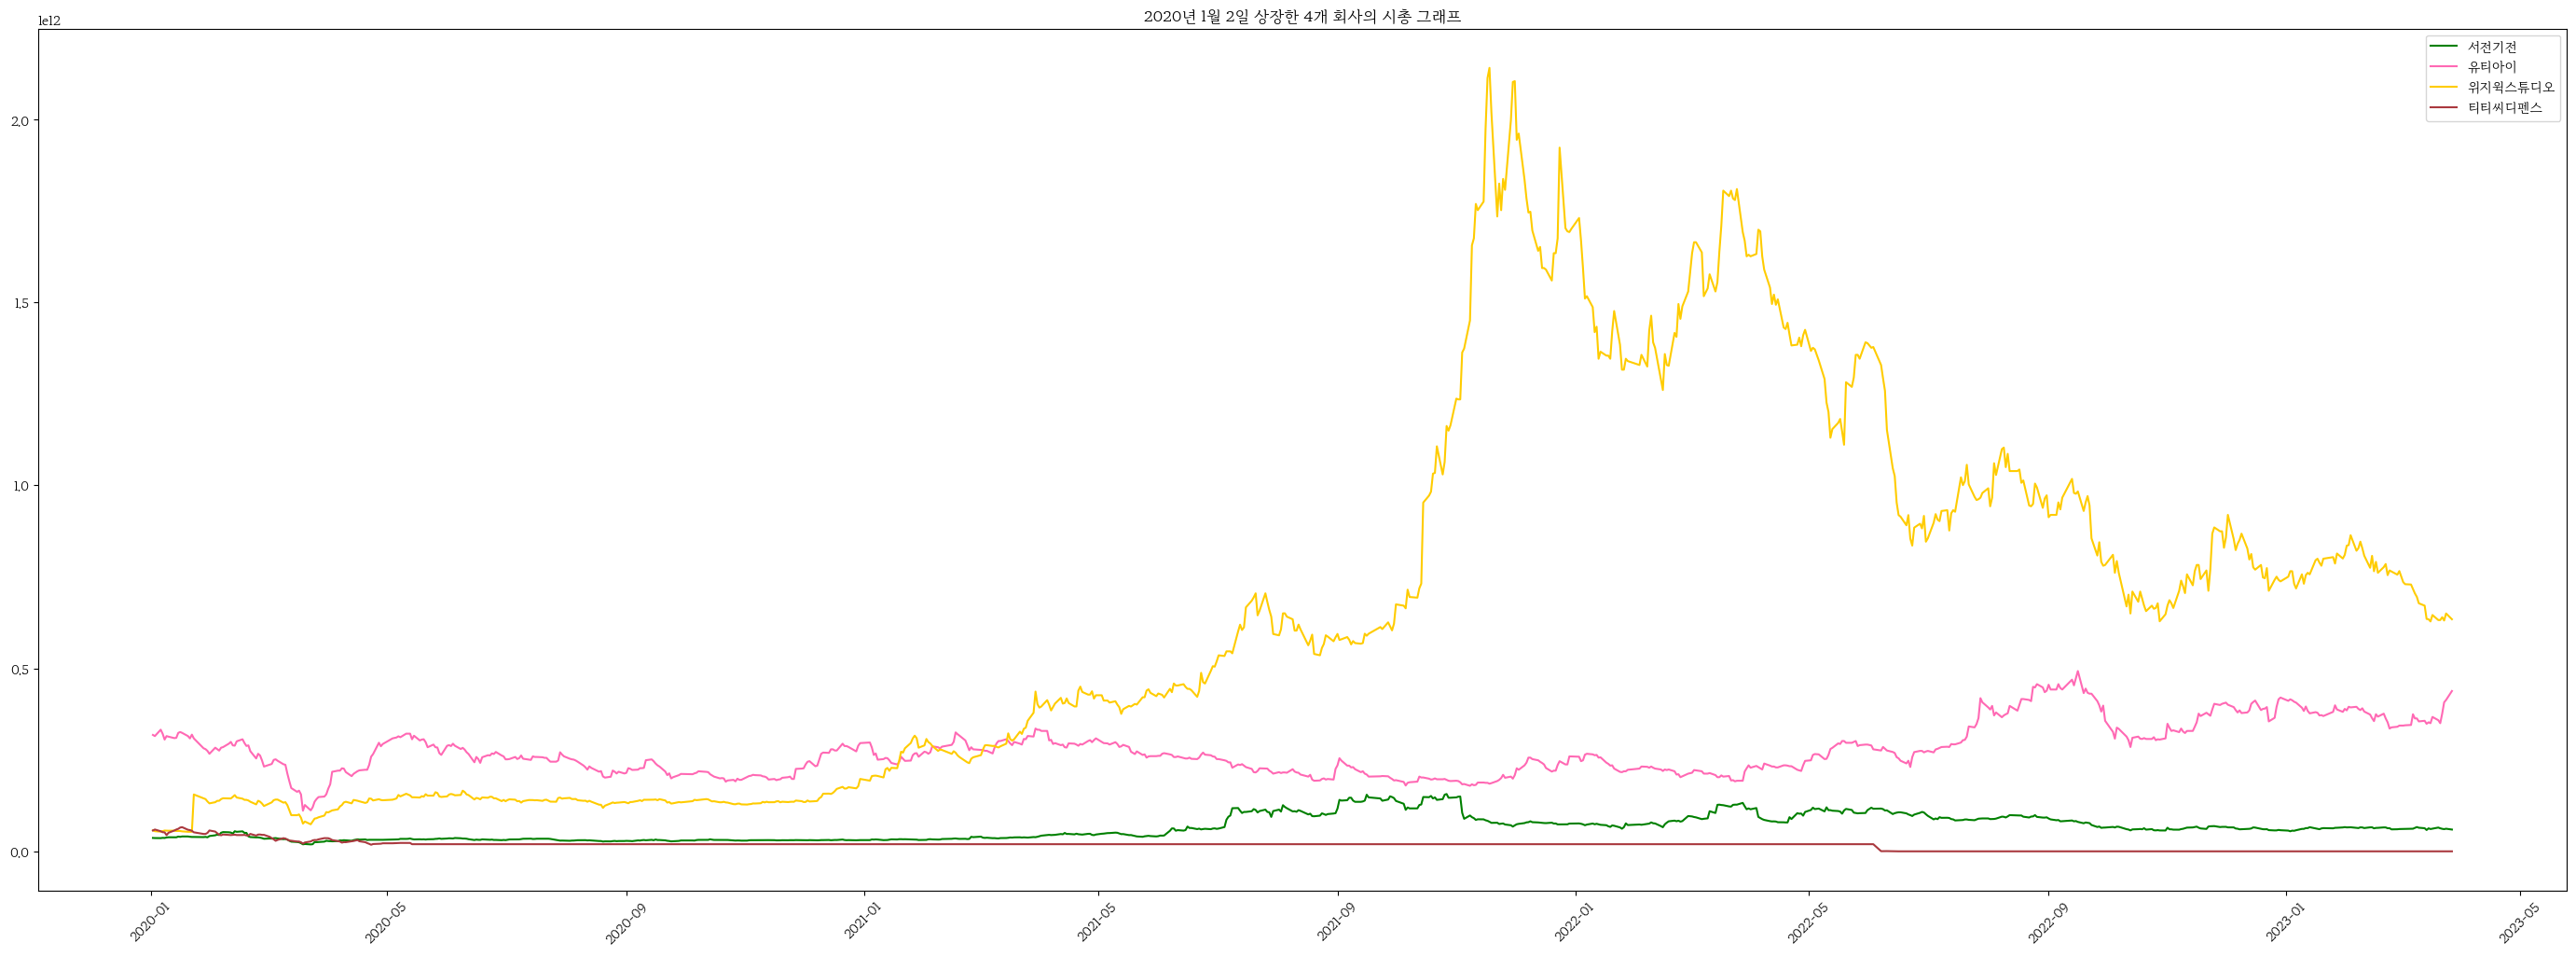

In [191]:
plt.figure(figsize = (35, 12)) # 전체 figure 크기

color =["green", "hotpink", (1, 0.8, 0), "#AA393F"]
for i, (data, label, c) in enumerate(zip(price20200102, stock20200102, color)):
    plt.plot(day, data, label = label, color=c) #이름으로 색 바꾸기 
plt.title("2020년 1월 2일 상장한 4개 회사의 시총 그래프", fontsize=30)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [192]:
price20200102 = []
for stock in stock20200102:
    data = df.query('itmsNm in @stock').sort_values("basDt")
    data_lst = list(data["fltRt"])
    price20200102.append(np.pad(data_lst,(0,800-len(data_lst)),constant_values=0))

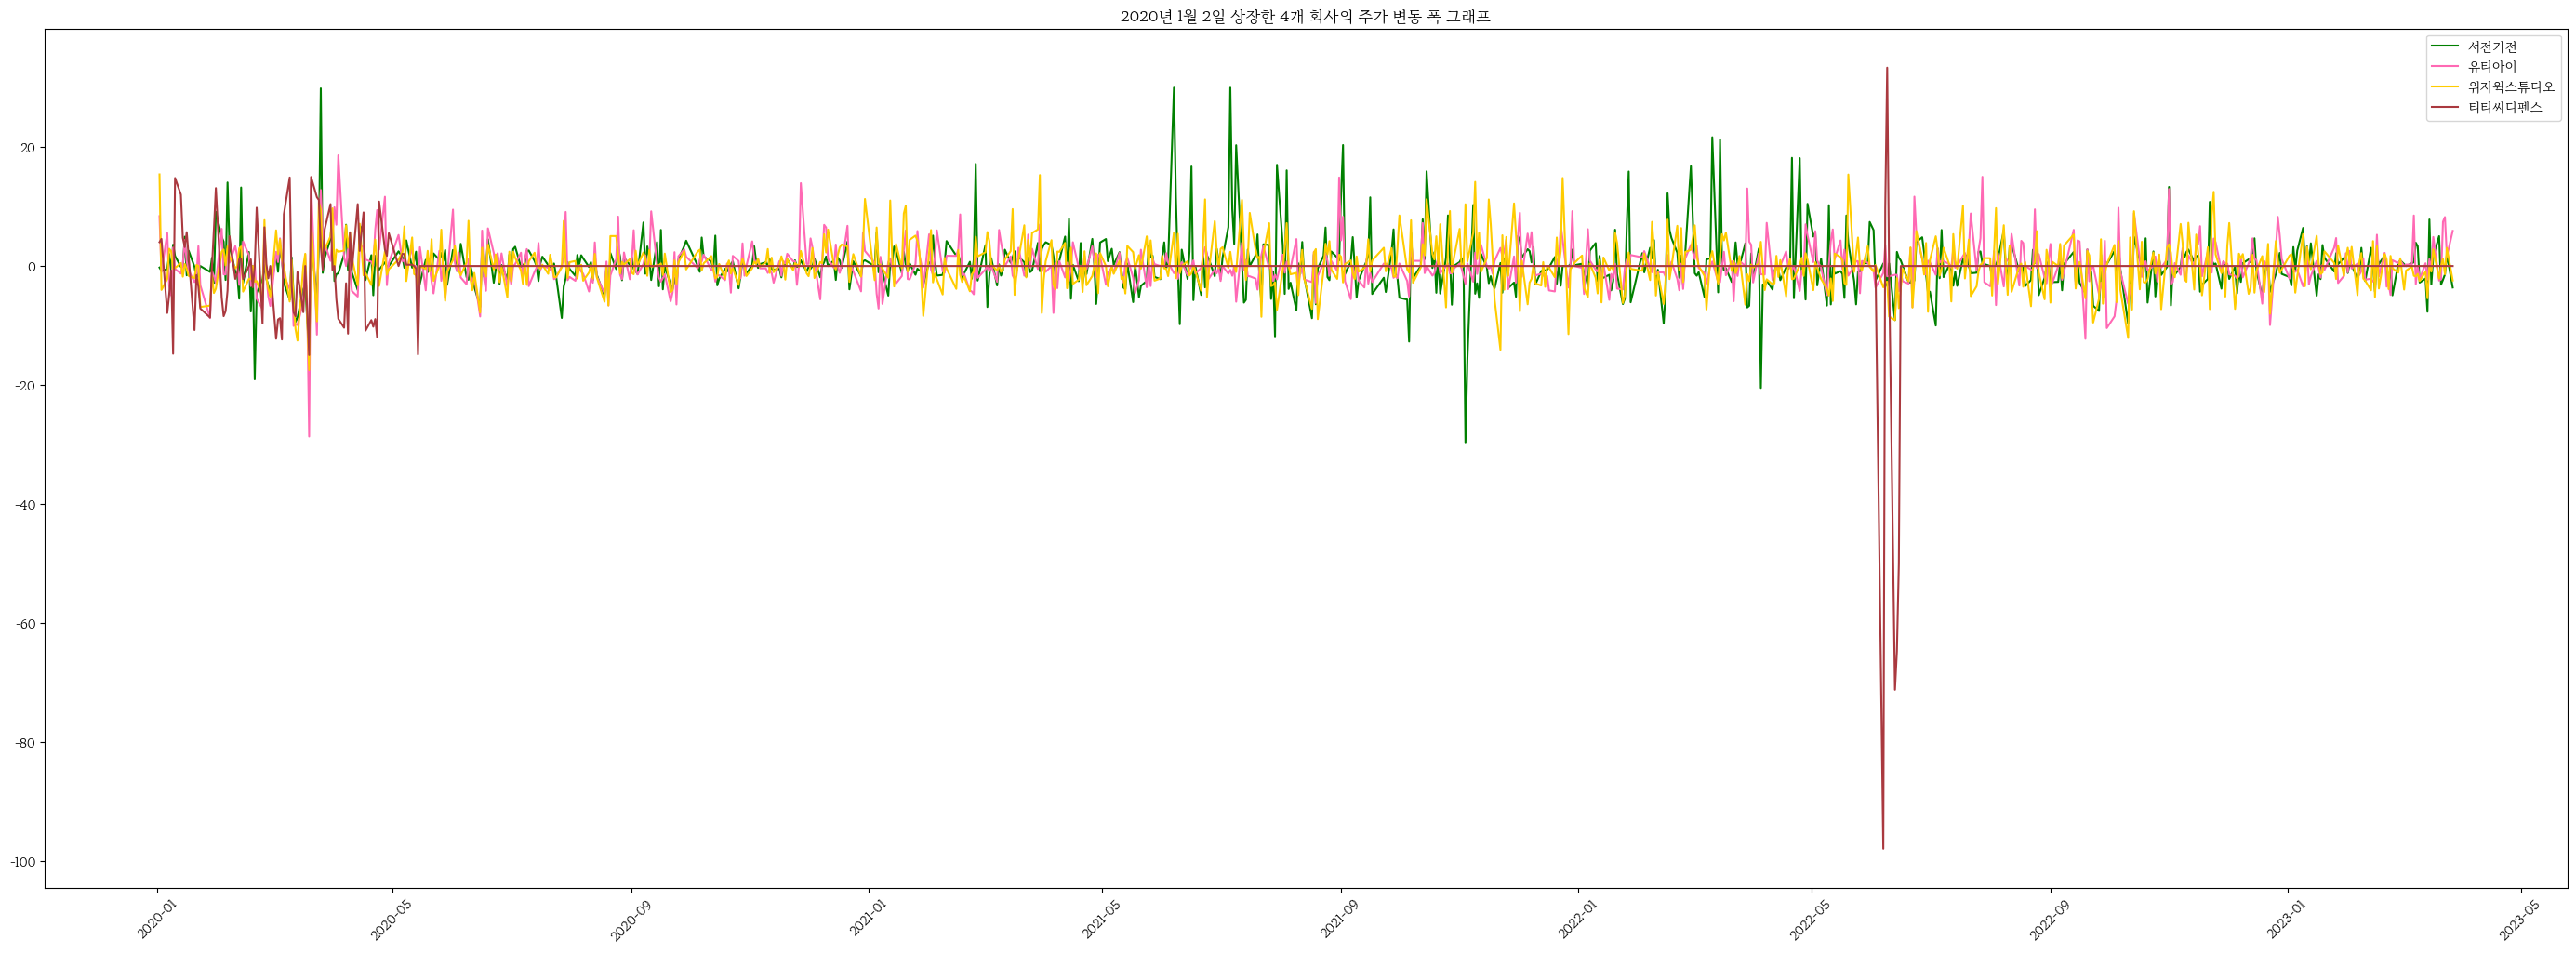

In [193]:
plt.figure(figsize = (35, 12)) # 전체 figure 크기

color =["green", "hotpink", (1, 0.8, 0), "#AA393F"]
for i, (data, label, c) in enumerate(zip(price20200102, stock20200102, color)):
    plt.plot(day, data, label = label, color=c) #이름으로 색 바꾸기 
plt.title("2020년 1월 2일 상장한 4개 회사의 주가 변동 폭 그래프", fontsize=30)
plt.xticks(rotation=45)
plt.legend()
plt.show()

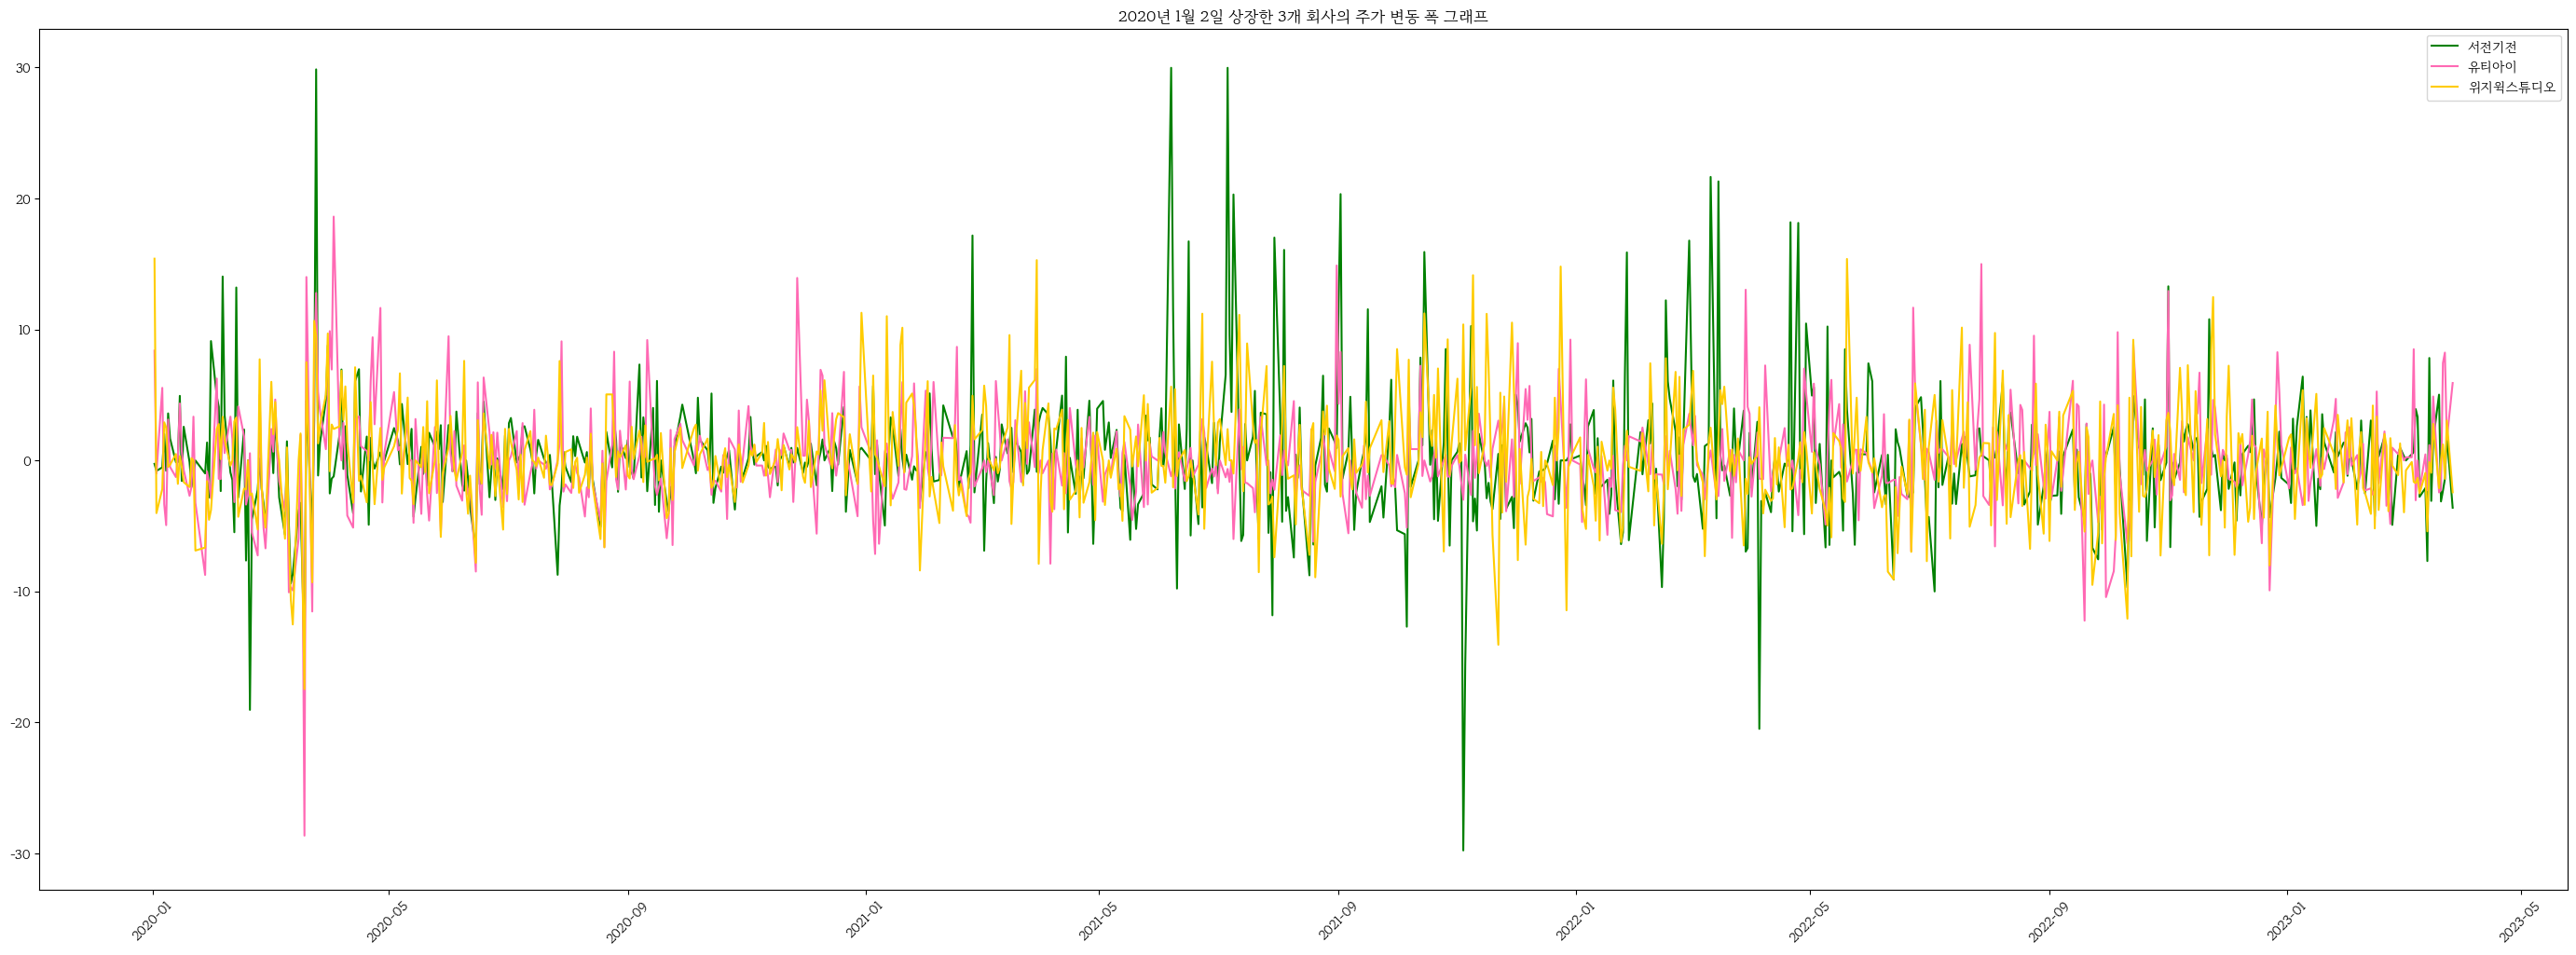

In [195]:
plt.figure(figsize = (35, 12)) # 전체 figure 크기

color =["green", "hotpink", (1, 0.8, 0), "#AA393F"]
for i, (data, label, c) in enumerate(zip(price20200102[:-1], stock20200102[:-1], color[:-1])):
    plt.plot(day, data, label = label, color=c) #이름으로 색 바꾸기 
plt.title("2020년 1월 2일 상장한 3개 회사의 주가 변동 폭 그래프", fontsize=30)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [198]:
list(df.groupby("basDt")["fltRt"].mean())

basDt
2020-01-02    6.882500
2020-01-03   -0.315000
2020-01-06   -1.265000
2020-01-07   -0.787500
2020-01-08   -0.997500
                ...   
2023-03-21   -0.366032
2023-03-22    0.737249
2023-03-23   -0.750847
2023-03-24    1.271587
2023-03-27    0.206984
Name: fltRt, Length: 800, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


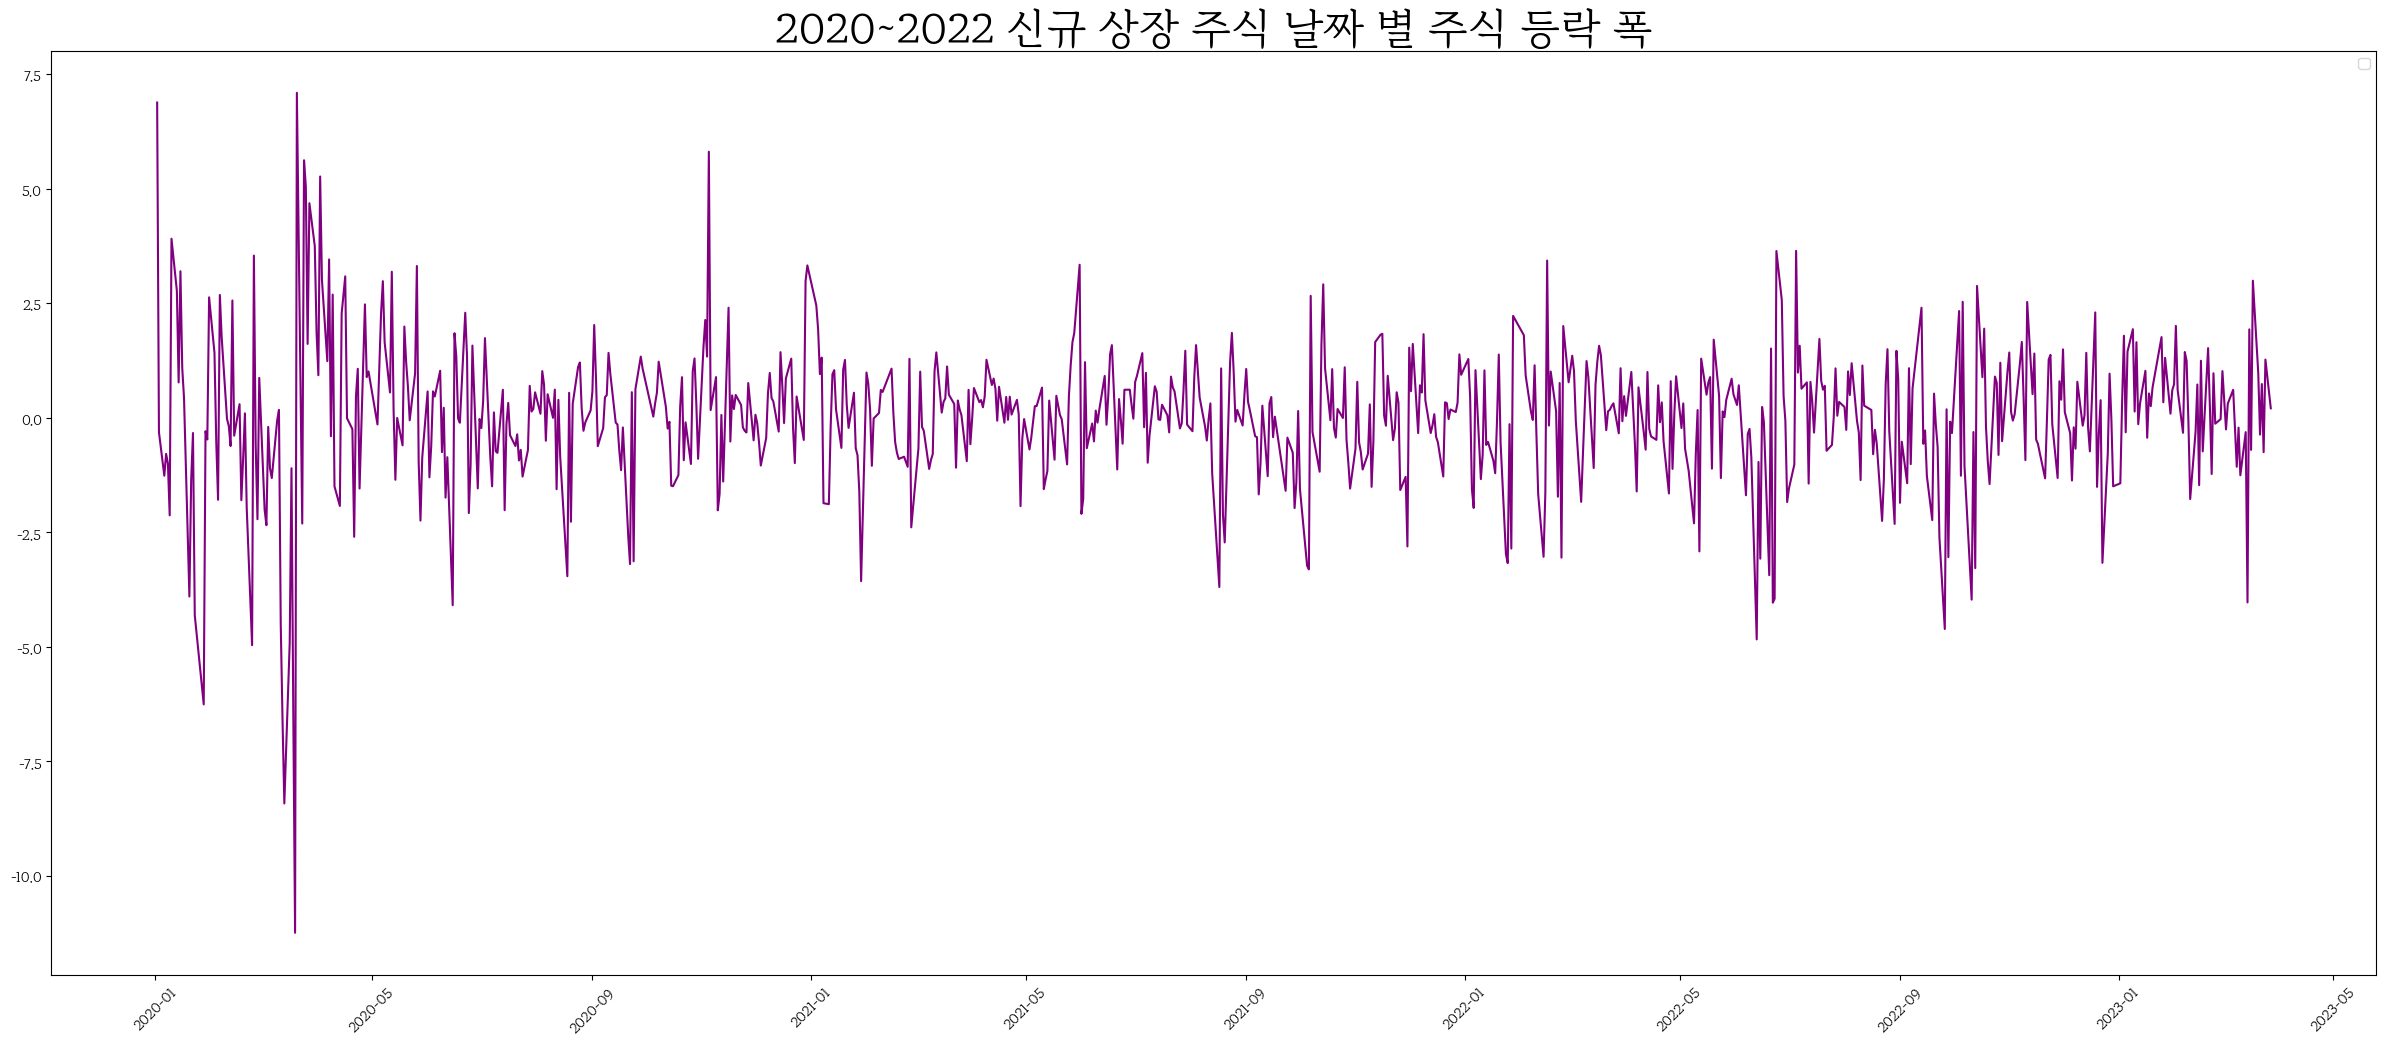

In [209]:
plt.figure(figsize = (30, 12)) # 전체 figure 크기
plt.plot(day, list(df.groupby("basDt")["fltRt"].mean()), color="purple") #이름으로 색 바꾸기 
plt.title("2020~2022 신규 상장 주식 날짜 별 주식 등락 폭", fontsize=30)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [212]:
print("2020~2022년 전체 신규 상장 주식 평균 등락 폭 :", df["fltRt"].mean())
print("2020.    년 전체 신규 상장 주식 평균 등락 폭 :", df.query("basDt<'2021'")["fltRt"].mean())
print("2021.    년 전체 신규 상장 주식 평균 등락 폭 :", df.query("basDt>='2021' & basDt<'2022'")["fltRt"].mean())
print("2022.    년 전체 신규 상장 주식 평균 등락 폭 :", df.query("basDt>='2022'")["fltRt"].mean())

2020~2022년 전체 신규 상장 주식 평균 등락 폭 : -0.0014229200265628772
2020.    년 전체 신규 상장 주식 평균 등락 폭 : 0.13202039660056603
2021.    년 전체 신규 상장 주식 평균 등락 폭 : 0.022539625159891045
2022.    년 전체 신규 상장 주식 평균 등락 폭 : -0.03506325981888094
